In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [117]:
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# column별 null 갯수
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
#  기술통계
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


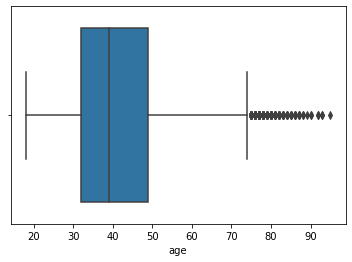

In [7]:
# graph 출력
sns.boxplot(x=bank['age'])

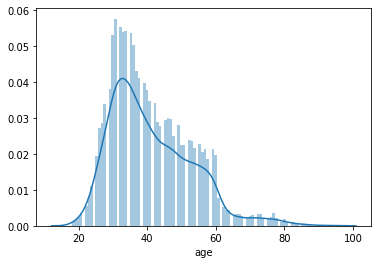

In [11]:
sns.distplot(bank['age'],bins=100)

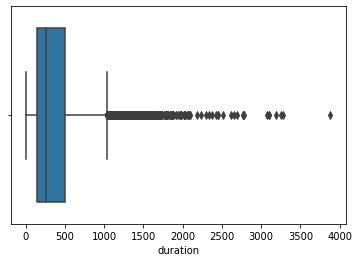

In [9]:
sns.boxplot(x=bank['duration'])

In [118]:
#  convert categorical data
bankData=bank.copy()
bankData.info()
bankData.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [119]:
# 'job' column별 갯수 출력
bankData['job'].value_counts()

# deposit==yes & bankData['job']
bankData[bankData.deposit=='yes'].groupby('job').size()

jobs=list(set(bankData['job'].values))
for j in jobs:
    print('{:15} : {:5}'.format(j,len(bankData[(bankData['deposit']=='yes')& (bankData['job']==j)])))

retired         :   516
technician      :   840
admin.          :   631
entrepreneur    :   123
unknown         :    34
self-employed   :   187
housemaid       :   109
student         :   269
blue-collar     :   708
services        :   369
management      :  1301
unemployed      :   202


In [120]:
# 특정 값 수정
bankData['job']=bankData['job'].replace(['management','admin.'],'white-collar')
bankData['job']=bankData['job'].replace(['services','housemaid'],'pink-collar')
bankData['job']=bankData['job'].replace(['retired','student','unknown'],'other')

In [121]:
bankData['job'].value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1208
pink-collar      1197
self-employed     405
unemployed        357
entrepreneur      328
Name: job, dtype: int64

In [124]:
bankData['poutcome']=bankData['poutcome'].replace('other','unknown')

In [125]:
bankData['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [126]:
# map 함수를 이용한 특정 값 수정
bankData['default_cat']=bankData['default'].map({'yes':1,'no':0})
bankData.drop('default',axis=1,inplace=True)

In [127]:
bankData['housing_cat']=bankData['housing'].map({'yes':1,'no':0})
bankData.drop('housing',axis=1,inplace=True)

In [128]:
bankData['loan_cat']=bankData['loan'].map({'yes':1,'no':0})
bankData.drop('loan',axis=1,inplace=True)

In [129]:
bankData['deposit_cat']=bankData['deposit'].map({'yes':1,'no':0})
bankData.drop('deposit',axis=1,inplace=True)

In [131]:
bankData.drop('day',axis=1,inplace=True)
bankData.drop('month',axis=1,inplace=True)

KeyError: "['day'] not found in axis"

In [132]:
# 특정 값 수정
bankData['pdays']=np.where(bankData['pdays']==-1,10000,bankData['pdays'])
#bankData.loc[bankData['pdays']==-1,'pdays']=10000

In [133]:
bankData['pdays']

0        10000
1        10000
2        10000
3        10000
4        10000
         ...  
11157    10000
11158    10000
11159    10000
11160      172
11161    10000
Name: pdays, Length: 11162, dtype: int64

In [134]:
bankData['recent_pdays']=np.where(bankData['pdays'],1/bankData['pdays'],1/bankData['pdays'])
bankData.drop('pdays', axis=1, inplace=True)

In [135]:
bankData.tail()

,age,job,marital,education,balance,contact,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,cellular,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,unknown,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,cellular,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,cellular,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,cellular,628,1,0,unknown,0,0,0,0,0.000100


In [139]:
# get_dummies()
bankWithDummies=pd.get_dummies(data=bankData,columns=['job','marital','education','poutcome'],prefix=['job','marital','education','poutcome'])
bankWithDummies.head()
bankWithDummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


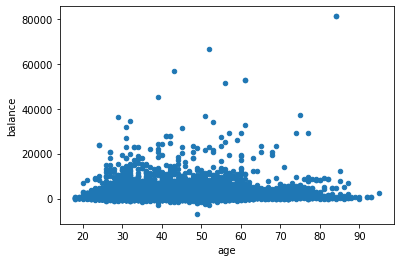

In [140]:
bankWithDummies.plot(kind='scatter',x='age',y='balance')

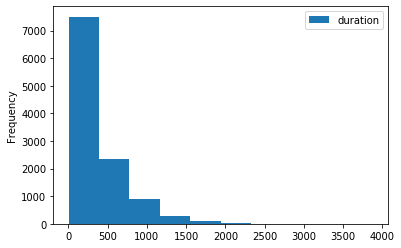

In [141]:
bankWithDummies.plot(kind='hist',x='poutcome_success',y='duration')

In [142]:
# 계약기간이 만료된 사람들
bankWithDummies[bankData.deposit_cat==1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# 정기예금, 개인대출, 주택대출 모두 있는 사람 수
len(bankWithDummies[(bankData['deposit_cat']==1)&(bankWithDummies['loan_cat'])&(bankWithDummies['housing_cat'])])

265

In [147]:
# 정기예금, 채무 불이행인 사람 수
len(bankWithDummies[(bankWithDummies['deposit_cat']==1)&(bankWithDummies['default_cat']==1)])

52

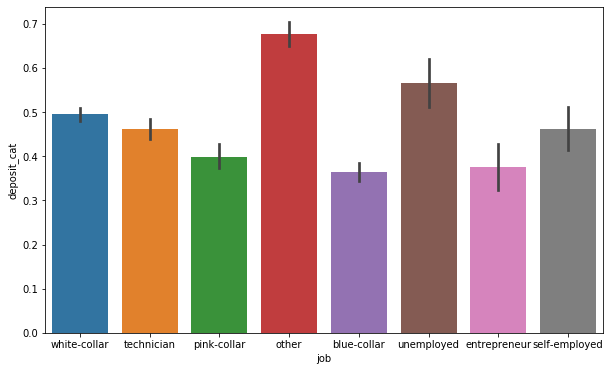

In [149]:
# 직업별 정기예금 가입 비율
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='deposit_cat',data=bankData)

In [153]:
# 상관계수
bankwd=bankWithDummies
corr=bankwd.corr()

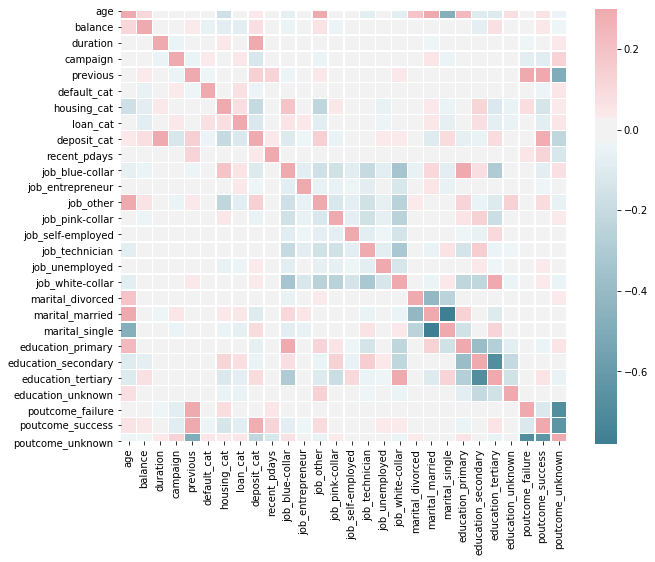

In [159]:
plt.figure(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,linewidths=.5,square=True,center=0,vmax=.3,cbar_kws={'shrink':.80})

In [163]:
corr_deposit=pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))

In [164]:
# deposit_cat 기준 내림차순 정렬
corr_deposit.sort_values(by='deposit_cat',ascending=False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.142426
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_unemployed,0.033487


In [180]:
## 모델 만들기
# 입력변수
dropDeposit=bankwd.drop('deposit_cat',1)
# 출력변수
label=bankwd.deposit_cat

In [183]:
# train_test_split(입력변수, 출력변수, 사이즈, 랜덤)
dataTrain, dataTest,labelTrain,labelTest=train_test_split(dropDeposit,label,train_size=0.5,random_state=42)

In [186]:
dt2=tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(dataTrain,labelTrain)
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)
print('training score :',dt2_sc_train)
print('test score :',dt2_sc_test)

ValueError: could not convert string to float: 'cellular'

In [185]:
dt5=tree.DecisionTreeClassifier(max_depth=5)
dt5.fit(dataTrain,labelTrain)
dt5_sc_train=dt5.score(dataTrain, labelTrain)
dt5_sc_test=dt5.score(dataTest, labelTest)
print('training score :',dt5_sc_train)
print('test score :',dt5_sc_test)

ValueError: could not convert string to float: 'cellular'

In [ ]:
dt10=tree.DecisionTreeClassifier(max_depth=10)
dt10.fit(dataTrain,labelTrain)
dt10_sc_train=dt10.score(dataTrain, labelTrain)
dt10_sc_test=dt10.score(dataTest, labelTest)
print('training score :',dt10_sc_train)
print('test score :',dt10_sc_test)

In [ ]:
dt=tree.DecisionTreeClassifier()
dt.fit(dataTrain,labelTrain)
dt_sc_train=dt.score(dataTrain, labelTrain)
dt_sc_test=dt.score(dataTest, labelTest)
print('training score :',dt_sc_train)
print('test score :',dt_sc_test)

In [ ]:
dt.get_depth()